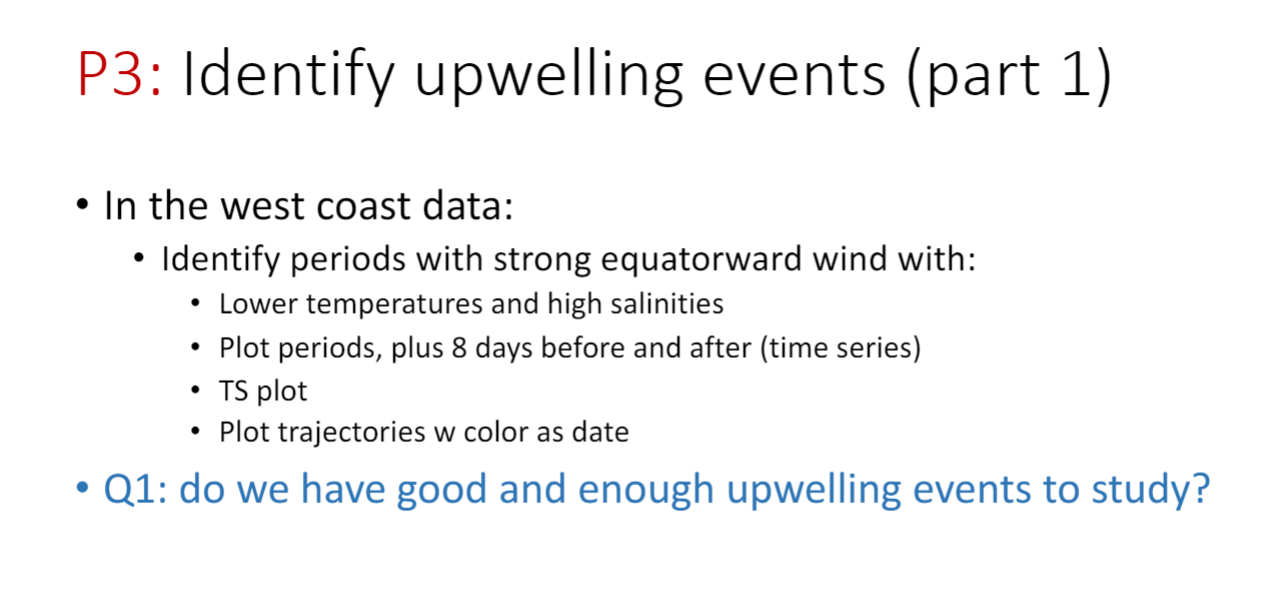

In [1]:
# import necessary packages
import numpy as np
import pandas as pd
import xarray as xr
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
import datetime
from datetime import date
import warnings

warnings.simplefilter('ignore')

# load map packages
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
import cartopy.feature as cfeature
import cartopy.crs as ccrs
from calendar import month_abbr
from trajectory_plot import trajectory_plot

from compile_function import Compile_Datasets   

# from compile_function import Compile_Datasets

day_in_nanoseconds = 86400000000000


datetime_unit_var = "D" # datetime_unit argument for differentiate function

VWND_MEAN_Threshold = -5

Delta_TEMP_CTD_MEAN_Threshold = 1

Delta_SAL_CTD_MEAN_Threshold = 0.5


In [2]:


# fn_list1 = ['saildrone_west_coast_survey_2018_sd1026_JPLv5.0_8dy_20210613norep_20210613_20211116.nc', 
#             'saildrone_west_coast_survey_2019_sd1047_JPLv5.0_8dy_20210613norep_20210613_20211116.nc', 
#             'saildrone_west_coast_survey_2019_sd1043_JPLv5.0_8dy_20210613norep_20210613_20211116.nc']

sail = Compile_Datasets("all")
print(len(sail.lat))
sail = sail.where((~np.isnan(sail["lon"])) | (~np.isnan(sail["lat"])) | (~np.isnan(sail["SAL_CTD_MEAN"])) | (~np.isnan(sail["TEMP_CTD_MEAN"])), drop = True)

no
no


ValueError: 'obs' is not present in all datasets.

In [7]:

upwelling_data = sail.where((sail.VWND_MEAN < VWND_MEAN_Threshold) & (sail.Delta_TEMP_CTD_MEAN < Delta_TEMP_CTD_MEAN_Threshold) & 
                            (sail.Delta_SAL_CTD_MEAN > Delta_SAL_CTD_MEAN_Threshold))


# reformat dates
upwelling_data['date'] = mdates.date2num(upwelling_data['time'].dt.date)

# ask what variable should be plotted
print([i for i in upwelling_data.data_vars])
var_to_plot=input('what variable should be plotted:')

trajectory_plot(upwelling_data, var_to_plot)


['lat', 'lon', 'SOG_MEAN', 'COG_MEAN', 'HDG_MEAN', 'ROLL_MEAN', 'PITCH_MEAN', 'UWND_MEAN', 'VWND_MEAN', 'WWND_MEAN', 'GUST_WND_MEAN', 'WIND_MEASUREMENT_HEIGHT_MEAN', 'TEMP_AIR_MEAN', 'RH_MEAN', 'BARO_PRES_MEAN', 'PAR_AIR_MEAN', 'TEMP_CTD_MEAN', 'TEMP_CTD_STDDEV', 'SAL_CTD_MEAN', 'TEMP_RBR_MEAN', 'SAL_RBR_MEAN', 'CHLOR_WETLABS_MEAN', 'CHLOR_MEAN', 'TEMP_O2_RBR_MEAN', 'CDOM_MEAN', 'sat_smap_sss', 'sat_anc_sss', 'sat_anc_sst', 'sat_smap_spd', 'sat_smap_high_spd', 'sat_weight', 'sat_land_fraction', 'sat_ice_fraction', 'sat_smap_sss_uncertainty', 'sat_lat', 'sat_lon', 'dist_land', 'analysed_sst', 'analysis_error', 'mask', 'sea_ice_fraction', 'relativeID', 'realID', 'duration', 'Delta_TEMP_CTD_MEAN', 'Delta_SAL_CTD_MEAN']


what variable should be plotted: Delta_TEMP_CTD_MEAN


latr
[-46.76453007058824, 74.95931162522524]
lonr
[168.93620555294115, -176.07294159238097]


ValueError: cannot convert float NaN to integer

<Figure size 4800x3000 with 2 Axes>